In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
user_behave = pd.read_csv('~/Documents/Data Science Practice/user_behavior_dataset.csv')

In [3]:
user_behave.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
user_behave.rename(columns={'App Usage Time (min/day)': 'AppUsageTime', 'Screen On Time (hours/day)': 'ScreenOnTime', 'Battery Drain (mAh/day)': 'BatteryDrain', 'Data Usage (MB/day)': 'DataUsage'}, inplace=True)

In [5]:
user_behave.head()

,User ID,Device Model,Operating System,AppUsageTime,ScreenOnTime,BatteryDrain,Number of Apps Installed,DataUsage,Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
user_behave.columns


Index(['User ID', 'Device Model', 'Operating System', 'AppUsageTime',
       'ScreenOnTime', 'BatteryDrain', 'Number of Apps Installed', 'DataUsage',
       'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [7]:
user_behave.rename(columns={'Number of Apps Installed': 'NumberOfAppsInstalled', 'App Usage Time': 'AppUsageTime'}, inplace=True)
m1 = smf.ols(formula='AppUsageTime ~ NumberOfAppsInstalled', data=user_behave)
r = m1.fit()



In [8]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AppUsageTime   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     7280.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:10:26   Log-Likelihood:                -3764.2
No. Observations:                 700   AIC:                             7532.
Df Residuals:                     698   BIC:                             7541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -47.2754      4.226    -11.188      0.000     -55.572     -38.979
NumberOfAppsInstalled     6.2825      0.074     85.322      0.000       6.138       6.427
==============================================================================
Omnibus:                        3.300   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.051
Skew:                          -0.101   Prob(JB):                        0.218
Kurtosis:                       2.747   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

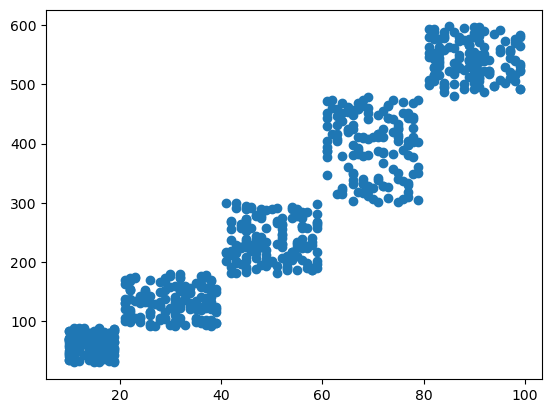

In [9]:
import matplotlib.pyplot as plt
plt.scatter(user_behave["NumberOfAppsInstalled"], user_behave["AppUsageTime"])

So, as you can see, there are some weird boxes indicating different levels of user usage of apps. So we need to filter the data more to inspect the relationship between amount of apps users have versus the total usage time.

In [10]:
user_behave.columns.unique

<bound method Index.unique of Index(['User ID', 'Device Model', 'Operating System', 'AppUsageTime',
       'ScreenOnTime', 'BatteryDrain', 'NumberOfAppsInstalled', 'DataUsage',
       'Age', 'Gender', 'User Behavior Class'],
      dtype='object')>

In [11]:
user_behave['User Behavior Class'].unique()

array([4, 3, 2, 5, 1])

As we can see, there are 5 levels of user behavior, This matches the five boxes from the above scatterplot. Therefore, we can inspect the classes one by one, examining the relationship between usage time and app amount, then inspecting the relationship between class and usage time.

In [12]:
user_behave.rename(columns={'Screen On Time': 'ScreenOnTime', 'Battery Drain': 'BatteryDrain', 'Data Usage': 'DataUsage'}, inplace=True)


In [13]:
user_behave_class1 = user_behave[user_behave['User Behavior Class'] == 1]

In [14]:
m2 = smf.ols(formula='AppUsageTime ~ NumberOfAppsInstalled', data=user_behave_class1)
r2 = m2.fit()



In [15]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AppUsageTime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4776
Date:                Mon, 25 Nov 2024   Prob (F-statistic):              0.491
Time:                        18:10:27   Log-Likelihood:                -579.51
No. Observations:                 136   AIC:                             1163.
Df Residuals:                     134   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                65.5859      7.612      8.617      0.000      50.532      80.640
NumberOfAppsInstalled    -0.3544      0.513     -0.691      0.491      -1.369       0.660
==============================================================================
Omnibus:                       53.412   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.621
Skew:                          -0.143   Prob(JB):                       0.0134
Kurtosis:                       1.800   Cond. No.                         76.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

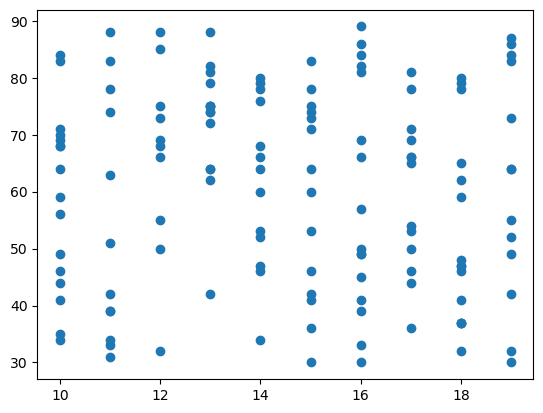

In [16]:
plt.scatter(user_behave_class1["NumberOfAppsInstalled"], user_behave_class1["AppUsageTime"])

Okay, so now we know that there is no relationship between the number of apps installed versus the app usage time. We can move onto other things.

In [17]:
user_behave_class1.columns

Index(['User ID', 'Device Model', 'Operating System', 'AppUsageTime',
       'ScreenOnTime', 'BatteryDrain', 'NumberOfAppsInstalled', 'DataUsage',
       'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [18]:
m3 = smf.ols(formula='AppUsageTime ~ Age', data=user_behave_class1)

In [19]:
r3 = m3.fit()

In [20]:
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AppUsageTime   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3483
Date:                Mon, 25 Nov 2024   Prob (F-statistic):              0.556
Time:                        18:10:28   Log-Likelihood:                -579.58
No. Observations:                 136   AIC:                             1163.
Df Residuals:                     134   BIC:                             1169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4527      5.253     10.938      0.000      47.064      67.842
Age            0.0778      0.132      0.590      0.556      -0.183       0.339
==============================================================================
Omnibus:                       58.345   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.937
Skew:                          -0.155   Prob(JB):                       0.0115
Kurtosis:                       1.783   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value is 0.556. Indicating that there is a 55% chance of obtaining a result as extreme as the observed one, given the null hypothesis is true. Since it is larger than 5%, this indicates the result is not significant and can occur by simply chance. So we now know that age is also not a strong indicator for phone usage.

In [21]:
user_behave_class1.columns

Index(['User ID', 'Device Model', 'Operating System', 'AppUsageTime',
       'ScreenOnTime', 'BatteryDrain', 'NumberOfAppsInstalled', 'DataUsage',
       'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

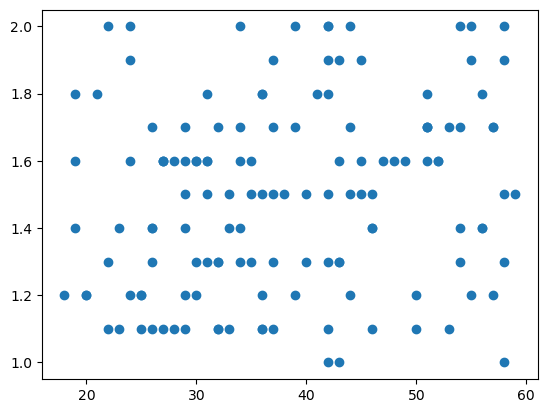

In [22]:
plt.scatter(user_behave_class1["Age"], user_behave_class1["ScreenOnTime"])

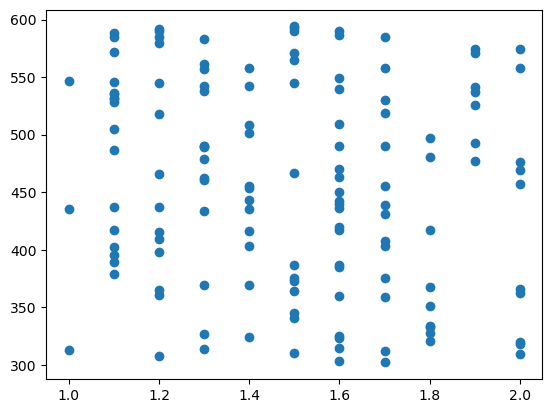

In [23]:
plt.scatter(user_behave_class1["ScreenOnTime"], user_behave_class1["BatteryDrain"])

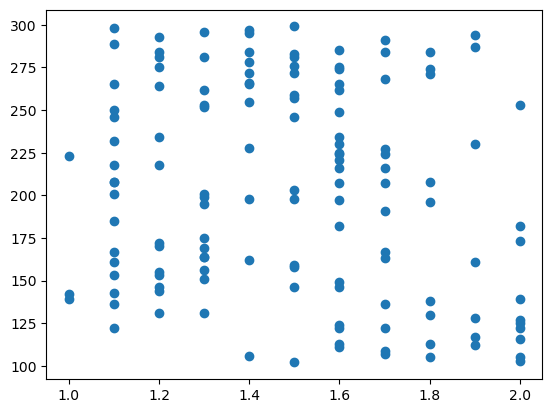

In [24]:
plt.scatter(user_behave_class1["ScreenOnTime"], user_behave_class1["DataUsage"])

In [40]:
user_behave


,User ID,Device Model,Operating System,AppUsageTime,ScreenOnTime,BatteryDrain,NumberOfAppsInstalled,DataUsage,Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [41]:
df = user_behave.drop(['Device Model', 'Operating System'], axis=1)

In [43]:
df["Gender"] = (df['Gender'] == 'Male').astype(int)

In [36]:
help(df.corr)

Help on method corr in module pandas.core.series:

corr(other: 'Series', method: 'CorrelationMethod' = 'pearson', min_periods: 'int | None' = None) -> 'float' method of pandas.core.series.Series instance
    Compute correlation with `other` Series, excluding missing values.
    
    The two `Series` objects are not required to be the same length and will be
    aligned internally before the correlation function is applied.
    
    Parameters
    ----------
    other : Series
        Series with which to compute the correlation.
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method used to compute correlation:
    
        - pearson : Standard correlation coefficient
        - kendall : Kendall Tau correlation coefficient
        - spearman : Spearman rank correlation
        - callable: Callable with input two 1d ndarrays and returning a float.
    
        .. warning::
            Note that the returned matrix from corr will have 1 along the
            diagonals

In [38]:
df.dtypes

dtype('int64')

<Axes: >

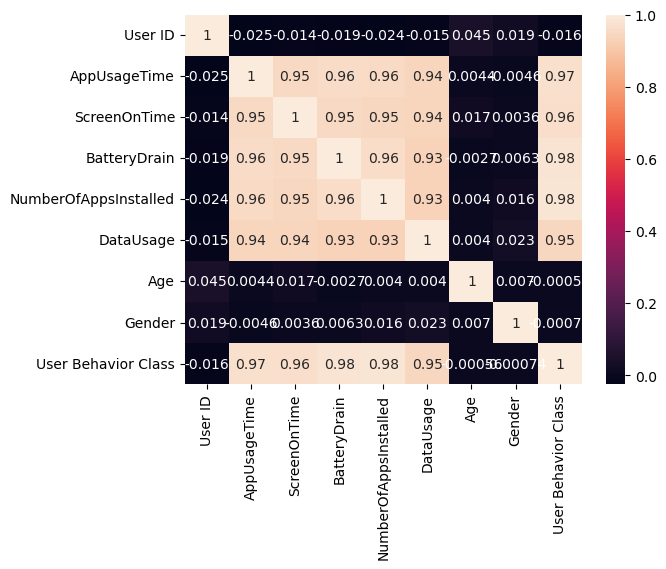

In [48]:
sns.heatmap(df.corr(), annot=True)

### So this heatmap is very useful for telling us which variables correlate to each other, we know that userID, Age, and Gender has no effect on app usage or battery drain or user behavior class on general, so we can exclude them when building our model.

### Sidenote, since we are classifying the user in 4 different classes, I don't think the logistic regression will work well but we can try.

In [51]:
df3 = user_behave.drop(['Age', 'Gender'], axis=1) # we want to drop columns

In [52]:
df3

,User ID,Device Model,Operating System,AppUsageTime,ScreenOnTime,BatteryDrain,NumberOfAppsInstalled,DataUsage,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,3
...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,1


Text(0.5, 1.0, 'App usage time against screen on time')

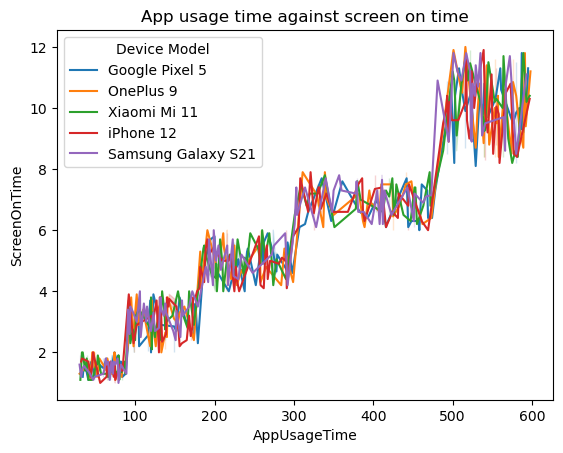

In [80]:
sns.lineplot(data=df3, x = 'AppUsageTime', y='ScreenOnTime', hue="Device Model")
plt.title("App usage time against screen on time")

Text(0.5, 1.0, 'App usage time against Battery Drain')

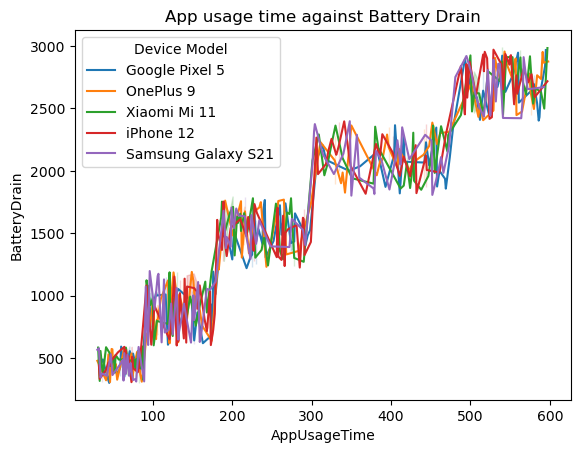

In [81]:
sns.lineplot(data=df3, x = 'AppUsageTime', y='BatteryDrain', hue="Device Model")
plt.title("App usage time against Battery Drain")

Text(0.5, 1.0, 'App installed versus Battery Drain')

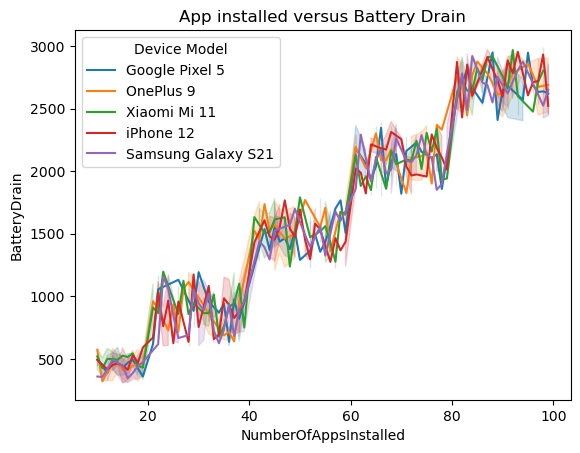

In [83]:
sns.lineplot(data=df3, x = 'NumberOfAppsInstalled', y='BatteryDrain', hue="Device Model")
plt.title("App installed versus Battery Drain")

### From the plots, we can see that there is a positive correlation with the variables screen on time, battery drain, app usage time, and number of app installed. So we can use those to find the different user cases.

In [53]:
df4 = df3.groupby('User Behavior Class')

In [58]:
df3.columns[3:8]

Index(['AppUsageTime', 'ScreenOnTime', 'BatteryDrain', 'NumberOfAppsInstalled',
       'DataUsage'],
      dtype='object')

In [60]:
df4[df3.columns[3:8]].mean()

,AppUsageTime,ScreenOnTime,BatteryDrain,NumberOfAppsInstalled,DataUsage
User Behavior Class,,,,,
1,60.426471,1.490441,454.977941,14.558824,202.323529
2,131.972603,3.037671,883.808219,30.753425,451.417808
3,235.398601,4.955944,1515.055944,50.000000,822.013986
4,395.748201,6.909353,2105.805755,69.920863,1232.230216
5,541.419118,10.114706,2701.014706,89.250000,1974.772059


### Now that we've examined the relationship between variables, let's build models!

### train, valid, test

In [87]:
df3

,User ID,Device Model,Operating System,AppUsageTime,ScreenOnTime,BatteryDrain,NumberOfAppsInstalled,DataUsage,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,3
...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,1


In [88]:
df5 = df3.drop(['User ID', 'Device Model', 'Operating System'], axis=1)

In [89]:
train, valid, test = np.split(df5.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #60% train, 20% valid, 20% test

In [90]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [91]:
train, X_train, y_train = scale_dataset(train)

In [92]:
valid, X_valid, y_valid = scale_dataset(valid)

In [93]:
test, X_test, y_test = scale_dataset(test)

In [94]:
X_train.shape

(420, 5)

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [96]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
y_pred = rf.predict(X_test)

In [98]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.96      1.00      0.98        22
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        26

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



### So our first attenpt to use random forest for predicting is very successful, with multiple 1s for precision, recall. And a overall accuracy of 0.99. This is very good because we know that this current model is really good at predicting the user cases. But just to make sure this is the best model, we will try using logistc model.

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [102]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        27
           2       0.95      0.95      0.95        22
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        26

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



### As we can tell by the report, the overall accuracy is still the same, at 0.99. However, if we inspect the precision or recall, some of it has gone down. Therefore, we can conclude that the random forest approach is better than the logistic regression model.